# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [2]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [4]:
#Shape
messages.shape

(26248, 4)

In [5]:
#Genre categories
messages.genre.value_counts()

news      13068
direct    10782
social     2398
Name: genre, dtype: int64

In [6]:
#Statistics about the length of messages
messages.message.apply(lambda x: len(x)).describe()

count    26248.000000
mean       144.754267
std        207.170242
min          4.000000
25%         75.000000
50%        124.000000
75%        179.000000
max      10818.000000
Name: message, dtype: float64

In [7]:
#Missing values
messages.isna().sum()

id              0
message         0
original    16064
genre           0
dtype: int64

In [8]:
#Datatypes
messages.dtypes

id           int64
message     object
original    object
genre       object
dtype: object

In [9]:
#There are duplicate rows in the dataset, which can simply be removed
messages = messages.drop_duplicates()
messages.shape

(26180, 4)

In [10]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [11]:
#Shape
categories.shape

(26248, 2)

In [12]:
#Missing values
categories.isna().sum()

id            0
categories    0
dtype: int64

In [13]:
#Also the categories dataset consists of duplicate message IDs
categories['id'].drop_duplicates().shape

(26180,)

In [14]:
#The problem is, however, that the rows with the same IDs do not necessarily contain the same content in the categories
#column, as evident below. The issue is dicussed later in the notebook.
categories.drop_duplicates().shape

(26216, 2)

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [15]:
#Note that the messages dataset is already without duplicates, so the duplicates in the merged df dataframe are solely
#due to duplicates in the categories dataframe
df = pd.merge(messages, categories, on = ['id'])
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [16]:
df.shape

(26248, 5)

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [17]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(";", expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [18]:
categories.shape

(26248, 36)

In [19]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x[:-2])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [20]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [21]:
for column in categories:
    # set each value to be the last character of the string, convert column from string to numeric
    categories[column] = categories[column].astype(str).str[-1].astype(int)
        
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#We need to have exclusively 0s and 1s in the data set. Test:
(pd.DataFrame(categories==0).sum() + pd.DataFrame(categories==1).sum()) == df.shape[0]

0
related                   False
request                    True
offer                      True
aid_related                True
medical_help               True
medical_products           True
search_and_rescue          True
security                   True
military                   True
child_alone                True
water                      True
food                       True
shelter                    True
clothing                   True
money                      True
missing_people             True
refugees                   True
death                      True
other_aid                  True
infrastructure_related     True
transport                  True
buildings                  True
electricity                True
tools                      True
hospitals                  True
shops                      True
aid_centers                True
other_infrastructure       True
weather_related            True
floods                     True
storm                      True
fire  

In [23]:
#The column 'related' needs to be cleaned
categories['related'].value_counts()

1    19930
0     6125
2      193
Name: related, dtype: int64

In [24]:
#Change 2s to 1s in the 'related' column
categories['related'][categories['related']==2]=1

In [25]:
#Remove columns in categories that have all 0 values. Such columns do not store any useful information and can be ignored.
categories = categories.drop(categories.columns[categories.sum()==0],axis=1)
categories.shape

(26248, 35)

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [26]:
# drop the original categories column from `df`
df = df.drop('categories',axis=1)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [27]:
df.shape

(26248, 4)

In [28]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df,categories],axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.shape

(26248, 39)

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [30]:
#Duplicate IDs
id_count = df['id'].value_counts()
len(id_count[id_count>1])

67

In [31]:
double_ids = id_count[id_count>1].index
double_ids

Int64Index([24779,  7747, 14246, 25512, 17553, 13914, 29119, 14135, 14592,
            17919, 18313,  6573, 18925, 14073, 12589,  6327, 27768, 23002,
             6492, 15938,  2446,  4956,  1652,  7892, 11503, 15576,  3250,
             5776,  6515, 24247, 29022, 19142, 24347,  3882, 13059, 17079,
             7945,  5265, 21338, 19687,  4412,  6393, 23229, 28462,   804,
            22858,   862, 15169, 17569, 27296, 28687, 12416, 10286,  5153,
            15760, 17385, 12420,  8190, 16245,  9131, 22059, 19003,  5643,
             5573,  3217,  6687,   202],
           dtype='int64')

### **Note**
Duplicate rows in the messages dataset have been removed before merging. Therefore, the duplicates in df are solely due to duplicates in the categories dataset. 

The problem with the categories dataset is that the rows with the same IDs do not necessarily contain the same content in the 'categories' column. This means that in some cases the df dataframe includes multiple different classifications for the same message. It is therefore not entirely correct to directly apply the drop_duplicates method, as we cannot be sure which row/classification to delete and which one to keep, and we do not want to lose valuable information. I first developed an approach where I would manually pick the more appropriate classification based on the content of a given message, and store the row location that needs to be deleted.

This approach, however, is not feasible if we are aiming to fully automate the ETL pipeline. It should run without manual intervention. Hoping no major information will be lost, I ultimately had to use a simpler approach by directly using the drop_duplicates method on the ID column, which keeps the first instance and deletes all other rows. The number of problematic rows with same ID and different categorization is rather low (only 36 cases), hence the rather unstructured approach does, from a big picture perspective (the dataset has more than 26 thousand rows), not seem to pose serious concerns.

In [32]:
pd.set_option('display.max_columns', 50)
problematic = []
nonproblematic = []
for ids in double_ids:
    print(ids)
    inspect = df[df['id']==ids]
    if inspect.drop_duplicates().shape[0]==1:
        print('Can delete the duplicate rows')
        print(inspect.index.values)
        print('\n')
        nonproblematic.extend(inspect.index[1:].values)
    else:
        print(df[df['id']==ids]['message'].unique()[0])
        print('ACTION: Inspect - the id is the same, but the content is not')
        print(df[df['id']==ids].drop_duplicates()[categories.columns])
        problematic.append(ids)
        print('\n')

#Manual deletion process
manual_delete = [6843, 22028, 14836, 12163, 16086, 24040, 5696, 4340, 1408, 10101, 2824, 5072, 5719, 5719, 20876,
                25156, 16280, 20966, 3373, 7037, 16769, 5606, 24647, 19625, 710, 10822, 9161, 4521, 13206, 14685, 10826,
                7263, 13645, 16155, 5877, 163]

#For problematic ones i manually select the more appropriate of the two depending on the message
#Nonproblematic ones are perfect duplicates and I can easily just delete the extra entries

#df_clean = df.drop(nonproblematic).drop(manual_delete)

24779
Can delete the duplicate rows
[21358 21359 21360]


7747
where we can paticipate in the law reorganizations? 
ACTION: Inspect - the id is the same, but the content is not
      related  request  offer  aid_related  medical_help  medical_products  \
6843        1        0      0            0             0                 0   
6844        0        0      0            0             0                 0   

      search_and_rescue  security  military  water  food  shelter  clothing  \
6843                  0         0         0      0     0        0         0   
6844                  0         0         0      0     0        0         0   

      money  missing_people  refugees  death  other_aid  \
6843      0               0         0      0          0   
6844      0               0         0      0          0   

      infrastructure_related  transport  buildings  electricity  tools  \
6843                       0          0          0            0      0   
6844                    

In [33]:
#Drop_duplicates method
df_clean = df.drop_duplicates('id')

In [34]:
df_clean.shape

(26180, 39)

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [35]:
engine = create_engine('sqlite:///disaster_response.db')
df_clean.to_sql('messages', engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

### 9. Visuals for the app

In [66]:
#Relative number of positives per category
categories_positives = (df_clean.iloc[:,4:].sum()/df_clean.shape[0]).sort_values(ascending = False).round(4)

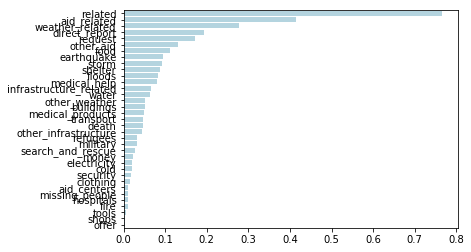

In [67]:
sns.barplot(y=categories_positives.index, x=categories_positives, orient = 'h', color='lightblue');

In [80]:
#Histogram of message lengths (without outliers)
lengths = df_clean['message'].apply(lambda x: len(x))
q1 = lengths.quantile(0.25)
q3 = lengths.quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

lengths_plot = lengths[(lengths>lower_bound)&(lengths<upper_bound)]

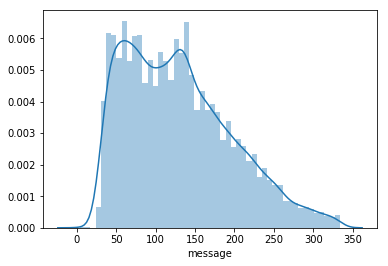

In [85]:
sns.distplot(lengths_plot);